In [1]:
pwd

u'C:\\Users\\ndokku'

In [2]:
cd C:\Users\ndokku\Desktop\csc-478 final

C:\Users\ndokku\Desktop\csc-478 final


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
import json
from pprint import pprint
import StringIO
from IPython.display import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier  
import urllib
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from sklearn.feature_selection import VarianceThreshold

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr, chi2
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_auc_score

In [6]:
cars_cancel_train = pd.read_csv('Kaggle_YourCabs_training.csv')
cars_cancel_train.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


# Information about the data (some values are missing)

In [7]:
# convert from_date column to date-time
# Note: when we try to convert NaN to date-time, it gets converted to NaT( Not a timestamp )

cars_cancel_train['from_date'] = pd.to_datetime(cars_cancel_train['from_date'])

In [8]:
# convert to_date column to date-time
cars_cancel_train['to_date'] = pd.to_datetime(cars_cancel_train['to_date'])

In [9]:
# convert booking_created column to date-time
cars_cancel_train['booking_created'] = pd.to_datetime(cars_cancel_train['booking_created'])

In [10]:
cars_cancel_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,43431.0,159206.473556,15442.386279,132512.00000,145778.000000,159248.000000,172578.50000,185941.000000
user_id,43431.0,30739.198153,10996.476709,16.00000,24614.000000,31627.000000,39167.00000,48730.000000
vehicle_model_id,43431.0,25.717230,26.798250,1.00000,12.000000,12.000000,24.00000,91.000000
package_id,7550.0,2.030066,1.461756,1.00000,1.000000,2.000000,2.00000,7.000000
travel_type_id,43431.0,2.137252,0.437712,1.00000,2.000000,2.000000,2.00000,3.000000
from_area_id,43343.0,714.544494,419.883553,2.00000,393.000000,590.000000,1089.00000,1403.000000
to_area_id,34293.0,669.490917,400.638225,2.00000,393.000000,541.000000,1054.00000,1403.000000
from_city_id,16345.0,14.915081,1.165306,1.00000,15.000000,15.000000,15.00000,31.000000
to_city_id,1588.0,68.537783,49.880732,4.00000,32.000000,49.000000,108.00000,203.000000
online_booking,43431.0,0.351592,0.477473,0.00000,0.000000,0.000000,1.00000,1.000000


We can see that many of the columns are missing values like package_id, to_area_id etc.


In [11]:
cars_cancel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null datetime64[ns]
to_date                25541 non-null datetime64[ns]
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null datetime64[ns]
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_erro

Let's also set id to be the index of the dataset

In [12]:
cars_cancel_train.set_index('id', inplace=True)

In [13]:
# lets find out the class balance
cars_cancel_train.Car_Cancellation.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

# Exploratory-analysis

Major class imbalance, very few cancellations as compared to large amount of non-cancellations.

In [14]:
# Lets see the distribution of package_id
%matplotlib inline
cars_cancel_train.package_id.value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

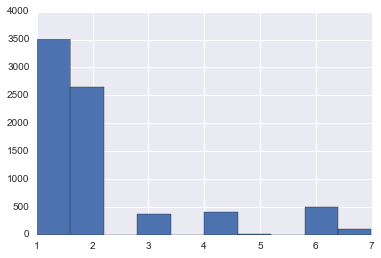

In [15]:
cars_cancel_train.package_id.hist();

Most of the packages that people opt for are for a journey of 4hrs and around 40kms, followed by 8hrs and 80kms.

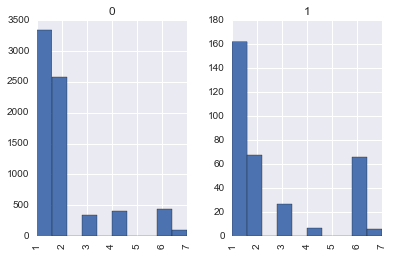

In [16]:
# Let's see whether package type affect car cancellations
cars_cancel_train.hist(column='package_id', by='Car_Cancellation');

As we can see most of the times 1st package ( 4hrs & 40kms ) gets cancelled followed by packages ( 3hrs & 30kms ) and ( 8hrs & 80kms ).

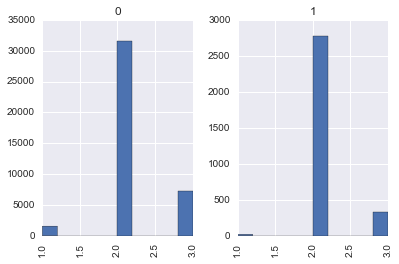

In [17]:
# Lets take a look at travel_type variable
cars_cancel_train.hist(column='travel_type_id', by='Car_Cancellation');

Not surprisingly, most people rent car from point to point travel and around ( 1 / 10 )th of these bookings get cancelled.

In [18]:
# Lets take a look at from_area_id variable and see if it has any relation with car cancellation.
g = cars_cancel_train.groupby(['from_area_id', 'Car_Cancellation']).size().unstack(1)

In [19]:
g.head()

Car_Cancellation,0,1
from_area_id,,
2.0,27.0,4.0
6.0,7.0,NaN
15.0,6.0,NaN
16.0,5.0,NaN
17.0,2.0,NaN


In [20]:
g['percent_cancelled'] = (g[1] / (g[1] + g[0])) * 100.

In [21]:
g.percent_cancelled.order(ascending=False).iloc[:20]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


from_area_id
130.0     80.000000
1148.0    66.666667
1174.0    66.666667
630.0     66.666667
176.0     52.830189
1381.0    50.000000
1160.0    50.000000
1100.0    50.000000
1385.0    50.000000
1276.0    45.454545
211.0     44.444444
1372.0    40.000000
356.0     40.000000
987.0     40.000000
626.0     34.375000
1258.0    33.333333
34.0      33.333333
326.0     33.333333
177.0     33.333333
833.0     33.333333
Name: percent_cancelled, dtype: float64

So as you can see there are certain areas ( from area ) for which more than 50% of the bookings were cancelled.

In [22]:
to = cars_cancel_train.groupby(['to_area_id', 'Car_Cancellation']).size().unstack(1)

In [23]:
to.head()

Car_Cancellation,0,1
to_area_id,,
2.0,4.0,NaN
6.0,2.0,NaN
15.0,3.0,2.0
16.0,3.0,1.0
17.0,1.0,NaN


In [24]:
to['percent_cancelled'] = (to[1] / (to[1] + to[0])) * 100.

In [25]:
to.percent_cancelled.order(ascending=False).iloc[:20]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


to_area_id
1247.0    75.000000
677.0     66.666667
355.0     66.666667
1218.0    60.000000
845.0     60.000000
1310.0    50.000000
1311.0    50.000000
1387.0    50.000000
1197.0    50.000000
1225.0    50.000000
1193.0    50.000000
1235.0    50.000000
598.0     50.000000
1357.0    50.000000
1336.0    50.000000
118.0     50.000000
122.0     41.463415
626.0     40.000000
520.0     40.000000
525.0     40.000000
Name: percent_cancelled, dtype: float64

In [26]:
from_to = cars_cancel_train.groupby(['from_area_id', 'to_area_id', 'Car_Cancellation']).size()

In [27]:
f_t = from_to.unstack(2)

In [28]:
f_t.head()

Car_Cancellation            0    1
from_area_id to_area_id           
2.0          222.0        1.0  NaN
             393.0       12.0  NaN
             452.0        1.0  NaN
             455.0        NaN  1.0
             572.0        NaN  1.0

In [29]:
f_t['percent_cancelled'] = (f_t[1] / (f_t[0] + f_t[1])) * 100.

In [30]:
f_t.percent_cancelled.order(ascending=False).iloc[:20]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


from_area_id  to_area_id
626.0         122.0         90.909091
1349.0        1052.0        83.333333
1330.0        176.0         80.000000
1052.0        1349.0        78.571429
625.0         452.0         75.000000
1296.0        793.0         75.000000
1365.0        293.0         75.000000
1285.0        61.0          70.588235
122.0         626.0         70.000000
176.0         136.0         66.666667
1068.0        352.0         66.666667
264.0         585.0         66.666667
1384.0        160.0         66.666667
839.0         585.0         66.666667
571.0         396.0         66.666667
83.0          176.0         66.666667
1095.0        25.0          66.666667
363.0         1068.0        66.666667
542.0         1237.0        66.666667
541.0         83.0          66.666667
Name: percent_cancelled, dtype: float64

So there are some routes for which the cancellation rate is pretty high, e.g. from area-626 to-122 almost 90% of the bookings were cancelled

In [31]:
# Lets see if online or mobile booking has any effect on cancellation
pd.pivot_table(cars_cancel_train[['online_booking', 'mobile_site_booking', 'Car_Cancellation']]
              , values='Car_Cancellation', index=['online_booking', 'mobile_site_booking'], aggfunc= np.count_nonzero)

online_booking  mobile_site_booking
0               0                       940
                1                       289
1               0                      1903
Name: Car_Cancellation, dtype: int64

So most of the cancellations are of orders that were booked online.

In [32]:
booking_diff = cars_cancel_train[['from_date', 'to_date', 'booking_created', 'Car_Cancellation']]

In [33]:
booking_diff.loc[:, 'difference'] = booking_diff.loc[:, ('from_date')] - booking_diff.loc[:, ('booking_created')]

C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
booking_diff.head()

,from_date,to_date,booking_created,Car_Cancellation,difference
id,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00


In [34]:
booking_diff.loc[:, 'diff_in_days']=(booking_diff.difference / np.timedelta64(1, 's')).astype(int)/ ( 24. * 60 * 60 )

In [35]:
booking_diff.head()

,from_date,to_date,booking_created,Car_Cancellation,difference,diff_in_days
id,,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00,0.014583
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00,0.274306
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00,0.015278
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00,0.045833
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00,0.046528


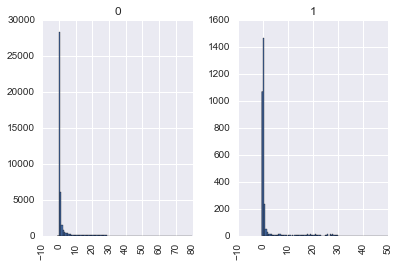

In [36]:
booking_diff.hist(column='diff_in_days', by='Car_Cancellation', bins=100);

** There seems to be no relation between number of days between date of booking and trip's start date with cancellation. Generally people tend to cancel their booking 5 days prior to their trip's start date which is not unusual **

# Data-Preparation

# Following features will be considered for analysis
    vehicle_model_id
    package_id
    travel_type_id
    from_area_id
    to_area_id
    from_city_id
    to_city_id
    days_before_booking
    online_booking
    mobile_site_booking
    from_month
    from_weekday
    booking_month
    booking_weekday
Many of them have missing values which have to be dealt accordingly

In [37]:
cars_cancel_train.columns

Index([u'user_id', u'vehicle_model_id', u'package_id', u'travel_type_id',
       u'from_area_id', u'to_area_id', u'from_city_id', u'to_city_id',
       u'from_date', u'to_date', u'online_booking', u'mobile_site_booking',
       u'booking_created', u'from_lat', u'from_long', u'to_lat', u'to_long',
       u'Car_Cancellation', u'Cost_of_error'],
      dtype='object')

In [38]:
cars_cancel_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 132512 to 185941
Data columns (total 19 columns):
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null datetime64[ns]
to_date                25541 non-null datetime64[ns]
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null datetime64[ns]
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-null float64
dtyp

In [39]:
cars_cancel_train.loc[:, 'from_month'] = cars_cancel_train.from_date.dt.month
cars_cancel_train.loc[:, 'from_weekday'] = cars_cancel_train.from_date.dt.weekday

cars_cancel_train.loc[:, 'booking_month'] = cars_cancel_train.booking_created.dt.month
cars_cancel_train.loc[:, 'booking_weekday'] = cars_cancel_train.booking_created.dt.weekday

In [40]:
cars_cancel_train.loc[:, 'days_before_booking'] = booking_diff['diff_in_days']

# Set up subsets X and y, and split them into train and test

In [41]:
features_cols = ['vehicle_model_id', 'travel_type_id', 'from_area_id',
                 'to_area_id','from_month', 'from_weekday',
                 'days_before_booking', 'online_booking', 'mobile_site_booking',
                 'booking_month', 'booking_weekday']

In [42]:
features = cars_cancel_train[features_cols]
y = cars_cancel_train.Car_Cancellation

In [43]:
# Add a new level ( -9999 ) for missing values
features.from_area_id.fillna(-9999, inplace=True)
features.to_area_id.fillna(-9999, inplace=True)

C:\Anaconda2\lib\site-packages\pandas\core\generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=1234567)

# Null Model

In [44]:
#null model and its accuracy
Cancellation_y = np.count_nonzero(y)
print 'Number of car bokking cancellation: %d' %Cancellation_y
# total observation is 43431, and Cancellation_y =3132 , so the null model is all zeros. 
null_ypred = np.ones(43431)
null_score = 1 - 3132/43431.0
print ('Null model accuracy: %f' %null_score)
null_auc = metrics.roc_auc_score(y, null_ypred)
print ('Null model AUC: %f' %null_auc)

Number of car bokking cancellation: 3132
Null model accuracy: 0.927886
Null model AUC: 0.500000


# Part 1: Model Evaluations without Feature Selection

# Model 1: Gaussian Naive Bayes

Average accuracy and AUC

In [45]:
# 10-fold cross-validation for GaussianNB 
m1_start = time.time()
gnb = GaussianNB()
m1_scores = cross_val_score(gnb, features, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Gaussian NB average accracy: %f" %m1_scores.mean())
m1_auc = cross_val_score(gnb, features, y, cv=10, scoring='roc_auc')
print ("Gaussian NB average AUC: %f" %m1_auc.mean())
m1_end = time.time()
m1_time = m1_end - m1_start 
print ("Computation time (in second): %f"
      % m1_time)

Gaussian NB average accracy: 0.869374
Gaussian NB average AUC: 0.738319
Computation time (in second): 0.938000


# Model 2: Logistcl Regression
Average accuracy and AUC


In [47]:
#10-fold cross-validation for logreg
m2_start = time.time()
logreg = LogisticRegression(C=1e9)
m2_scores = cross_val_score(logreg, features, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Logistic regression average accracy: %f" %m2_scores.mean())
m2_auc = cross_val_score(logreg, features, y, cv=10, scoring='roc_auc')
print ("Logistic regression average auc: %f" %m2_auc.mean())
m2_end = time.time()
m2_time = m2_end - m2_start 
print ("Computation time (in second): %f" % m2_time)

Logistic regression average accracy: 0.927886
Logistic regression average auc: 0.759234
Computation time (in second): 13.082000


# Model 3: Decision Tree Classifier

Parameter tunning: max_depth

In [46]:
# search for an optimal value of max_depth for treeclf
tune1_start = time.time()
d_range = range(1,30)
d_scores = []
for d in d_range:
    treeclf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(treeclf, features, y, cv=10, scoring='accuracy')
    d_scores.append(scores.mean())
tune1_end = time.time()
print "Computation time : %f" % (tune1_end - tune1_start)
print "Index of the best score:" 
np.where(d_scores == max(d_scores))

Computation time : 37.835000
Index of the best score:


(array([1], dtype=int64),)

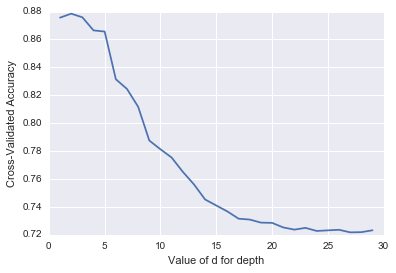

In [48]:
%matplotlib inline
# plot the value of d for treeclf (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(d_range, d_scores)
plt.xlabel('Value of d for depth')
plt.ylabel('Cross-Validated Accuracy')

# Average accuracy and AUC

In [49]:

# 10-fold cross-validation for Decision Tree with the optimal max depth (previously found max_depth=4)
m3_start = time.time()
treeclf = DecisionTreeClassifier(max_depth = 5)
m3_scores = cross_val_score(treeclf, features, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Decision Tree average accuracy: %f" % m3_scores.mean())
m3_auc = cross_val_score(treeclf,features, y, cv=10, scoring='roc_auc')
print ("Decision Tree average AUC: %f" % m3_auc.mean())
m3_end = time.time()
m3_time = m3_end - m3_start
print ("Computation time (in second): %f" % m3_time)

Decision Tree average accuracy: 0.865658
Decision Tree average AUC: 0.675560
Computation time (in second): 1.522000


# Model 4.1: Ensemble Bagging (use Decision Tree as base estimator)
Parameter tuning: n_estimator and max_samples

In [50]:
# search for an optimal values of n_estimator and max_samples for bagging
tune4_start = time.time()
est_range = range(1,21)  
sam_range = range(100,2001,100)
tune4_scores = np.empty(shape=[20,20])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, features, y, cv=10, scoring='accuracy')
        tune4_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
tune4_end = time.time()
print ("Computation time : %f" % (tune4_end - tune4_start))
print "Index of the best score: "
np.where(tune4_scores == tune4_scores.max())

Computation time : 490.141000
Index of the best score: 


(array([1], dtype=int64), array([0], dtype=int64))

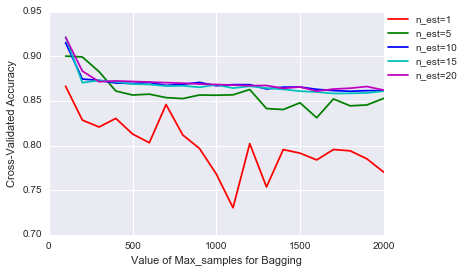

In [51]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, tune4_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, tune4_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, tune4_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, tune4_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, tune4_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Bagging')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Average accuracy and AUC

In [52]:
# 10-fold cross-validation for Bagging using Decision Tree as the base estimator 
# previously found n_estimators=20, max_samples=1900
m4a_start = time.time()
bag = BaggingClassifier(n_estimators=20, max_samples=1900)
m4a_scores = cross_val_score(bag, features, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging average acurracy: %f" % m4a_scores.mean())
m4a_auc = cross_val_score(bag, features, y, cv=10, scoring='roc_auc')
print ("Bagging average AUC: %f" % m4a_auc.mean())
m4a_end = time.time()
m4a_time = m4a_end - m4a_start
print ("Computation time (in second): %f" % m4a_time)

Bagging average acurracy: 0.865520
Bagging average AUC: 0.622129
Computation time (in second): 5.683000


# Model 4.2: Ensemble Bagging (use Gaussian NB as base estimator)
Parameter tuning: n_estimator and max_samples

In [53]:
# search for an optimal values of n_estimator and max_samples for bagging using GNB as the base estimator 
# the accuracy didn't look right! All of them are about zero???!!!
tune4b_start = time.time()
gnb = GaussianNB()
est_range = range(1,21)  
sam_range = (1,100,200,300,400,500)
tune4b_scores = np.empty(shape=[20,6])
i = 0
for est in est_range:
    for sam in sam_range:
        bag = BaggingClassifier(base_estimator= gnb, n_estimators=est, max_samples=sam)
        scores = cross_val_score(bag, features, y, cv=10, scoring='accuracy')
        tune4b_scores[est-1, i] = scores.mean()
        i = i+1
    i = 0
tune4b_end = time.time()
print ("Computation time : %f" % (tune4b_end - tune4b_start))
print "Index of the best score: "
np.where(tune4b_scores == tune4b_scores.max())

Computation time : 367.203000
Index of the best score: 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

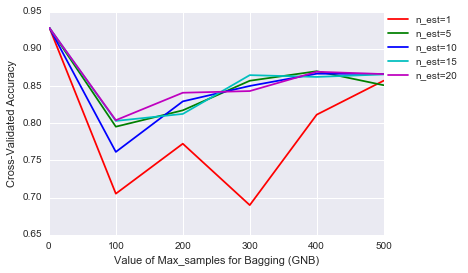

In [54]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(sam_range, tune4b_scores[0,:],'r', label ='n_est=1')
plt.plot(sam_range, tune4b_scores[4,:],'g',label = 'n_est=5')
plt.plot(sam_range, tune4b_scores[9,:],'b',label = 'n_est=10')
plt.plot(sam_range, tune4b_scores[14,:],'c', label ='n_est=15')
plt.plot(sam_range, tune4b_scores[19,:],'m',label = 'n_est=20')
plt.xlabel('Value of Max_samples for Bagging (GNB)')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

# Average accuracy and AUC

In [55]:
# 10-fold cross-validation for Bagging using GNB as the base estimator 
# we will use the default parameters 
m4b_start = time.time()
gnb = GaussianNB()
bag2 = BaggingClassifier(base_estimator=gnb)
m4b_scores = cross_val_score(bag2, features, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Bagging (GNB) average acurracy: %f" % m4b_scores.mean())
m4b_auc = cross_val_score(bag2, features, y, cv=10, scoring='roc_auc')
print ("Bagging (GNB) average AUC: %f" % m4b_auc.mean())
m4b_end = time.time()
m4b_time = m4b_end - m4b_start
print ("Computation time (in second): %f" % m4b_time)

Bagging (GNB) average acurracy: 0.866749
Bagging (GNB) average AUC: 0.736956
Computation time (in second): 5.844000


# Model 5: Ensemble Random Forest
Parameter tuning: n_estimator and max_depth

In [56]:
# search for an optimal values of n_estimator and max_depth for Random Forest Classifier 
tune5_start = time.time()
est_range = range(1,16)
dep_range = range(1,16)
tune5_scores = np.empty(shape=[15,15])
for est in est_range:
    for dep in dep_range:
        rfc = RandomForestClassifier(n_estimators=est, max_depth=dep)
        scores = cross_val_score(rfc, features, y, cv=10, scoring='accuracy')
        tune5_scores[est-1, dep-1] = scores.mean()
tune5_end = time.time()
print ("Computation time : %f" % (tune5_end - tune5_start))
print "Index of the best score: "
np.where(tune5_scores == tune5_scores.max())

Computation time : 401.843000
Index of the best score: 


(array([ 0,  1,  2,  3,  4,  6,  6,  7,  7,  9, 10, 11, 12, 13, 14], dtype=int64),
 array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64))

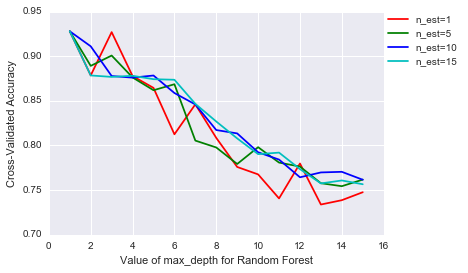

In [57]:
%matplotlib inline
# plot the value of max_samples for bagging (x-axis) versus the cross-validated accuracy (y-axis)
# each line represents a different value of n_estimators
plt.plot(dep_range, tune5_scores[0,:],'r', label ='n_est=1')
plt.plot(dep_range, tune5_scores[4,:],'g',label = 'n_est=5')
plt.plot(dep_range, tune5_scores[9,:],'b',label = 'n_est=10')
plt.plot(dep_range, tune5_scores[14,:],'c', label ='n_est=15')
plt.xlabel('Value of max_depth for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Average accuracy and AUC

In [58]:
# 10-fold cross-validation for Bagging
# previously found best n_estimator = 14, max_depth = 8
m5_start = time.time()
rfc = RandomForestClassifier(n_estimators=14, max_depth=8)
m5_scores = cross_val_score(rfc, features, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Random Forest average scores: %f" % m5_scores.mean())
m5_auc = cross_val_score(rfc, features, y, cv=10, scoring='roc_auc')
print ("Random Forest AUC: %f" % m5_auc.mean())
m5_end = time.time()
m5_time = m5_end - m5_start
print ("Computation time (in second): %f" % m5_time)

Random Forest average scores: 0.799621
Random Forest AUC: 0.563945
Computation time (in second): 5.936000


# Model 6: K Nearest Neighbor

Parameter tuning: k

In [59]:
# search for an optimal value of K for KNN
tune6_start = time.time()
k_range = range(1, 140)
tune6_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features, y, cv=10, scoring='accuracy')
    tune6_scores.append(scores.mean())
tune6_end = time.time()
print ("Computation time: %f" % (tune6_end - tune6_start))
print "Index of the best score:"
np.where(tune6_scores == max(tune6_scores))

Computation time: 365.857000
Index of the best score:


(array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138], dtype=int64),)

(array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138], dtype=int64),)

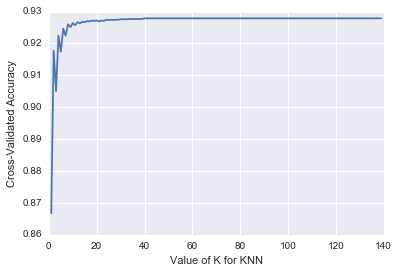

In [60]:
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, tune6_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
np.where(tune6_scores == max(tune6_scores))

Average accuracy and AUC

In [61]:
#previously found optimal k = 25
m6_start = time.time()
knn = KNeighborsClassifier(n_neighbors=25)
m6_scores = cross_val_score(knn, features, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("Knn average accuracy: %f" %m6_scores.mean())
m6_auc = cross_val_score(knn, features, y, cv=10, scoring='roc_auc')
print ("knn average AUC: %f" %m6_auc.mean())
m6_end = time.time()
m6_time = m6_end - m6_start 
print ("Computation time (in second): %f" % m6_time)

Knn average accuracy: 0.927356
knn average AUC: 0.652422
Computation time (in second): 3.950000


# Model 7: SVM Gaussian Kernel

Parameter tuning: Gamma

In [ ]:
#parameter tuning hasn't been computed, it should take a LONG time
tune7_start = time.time()
gamma_range = [.1,1,5,10]
tune7_scores = []
for g in gamma_range:
    svm_rbf = svm.SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svm_rbf, features, y, cv=10, scoring='accuracy')
    tune7_scores.append(scores.mean())
tune7_end = time.time()
print ("Computation time: %f"
      % tune7_end - tune7_start)

In [ ]:
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range, tune7_scores)
plt.xlabel('Value of gamma for SVM Gaussian')
plt.ylabel('Cross-Validated Accuracy')

Average accuracy and AUC

In [ ]:
#10-fold cross-validation for SVM Gaussian
#I used the default parameter
m7_start = time.time()
svm_rbf = svm.SVC(kernel='rbf')
m7_scores = cross_val_score(svm_rbf, features, y, cv=10, scoring='accuracy')
# use average accuracy as an estimate of out-of-sample accuracy
print ("SVM Gaussian average accuracy: %f" %m7_scores.mean())
m7_auc = cross_val_score(svm_rbf, features, y, cv=10, scoring='roc_auc')
print ("SVM Gaussian average AUC: %f" %m7_auc.mean())
m7_end = time.time()
m7_time = m7_end - m7_start 
print ("Computation time (in second): %f" % m7_time)

# Model 8: Ensemble Voting Classifier
Average accuracy and AUC

In [62]:
m8_start = time.time()
clf1 = DecisionTreeClassifier(max_depth = 5)
clf2 = RandomForestClassifier(n_estimators=14, max_depth=8)
clf3 = BaggingClassifier(n_estimators=20, max_samples=1900)
eclf = VotingClassifier(estimators=[('treeclf', clf1), ('rf', clf2), ('bag', clf3)], voting='soft')
m8_scores = cross_val_score(eclf, features, y, cv=10, scoring='accuracy').mean()
# use average accuracy as an estimate of out-of-sample accuracy
print ("Voting Classifier average scores: %f" % m8_scores.mean())
m8_auc = cross_val_score(eclf, features, y, cv=10, scoring='roc_auc')
print ("Voting Classifier AUC: %f" % m8_auc.mean())
m8_end = time.time()
m8_time = m8_end - m8_start
print ("Computation time (in second): %f" % m8_time)

Voting Classifier average scores: 0.864231
Voting Classifier AUC: 0.637923
Computation time (in second): 11.937000


# Compare the ROC Curves

In [71]:
start1 = time.time()
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_y_pred_prob = gnb.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, gnb_thresholds = metrics.roc_curve(y_test, gnb_y_pred_prob)
print 'Gaussian Naive Bayes AUC: ', metrics.roc_auc_score(y_test, gnb_y_pred_prob)
end1 = time.time()
run1 = end1 - start1
print ("Computation time: %f" %run1 )

start2 = time.time()
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train,y_train)
lr_y_pred_prob = logreg.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_y_pred_prob)
print 'Logistic Regression AUC: ', metrics.roc_auc_score(y_test, lr_y_pred_prob)
end2 = time.time()
run2 = end2 - start2
print ('Computation time: %f' %run2)

start3 = time.time()
treeclf = DecisionTreeClassifier(max_depth = 5)
treeclf.fit(X_train,y_train)
ct_y_pred_prob = treeclf.predict_proba(X_test)[:, 1]
ct_fpr, ct_tpr, ct_thresholds = metrics.roc_curve(y_test, ct_y_pred_prob)
print 'Decision Tree AUC: ', metrics.roc_auc_score(y_test, ct_y_pred_prob)
end3 = time.time()
run3 = end3 - start3
print ('Computation time: %f' %run3)

start4a = time.time()
bag = BaggingClassifier(n_estimators=20, max_samples=1900)
bag.fit(X_train,y_train)
bag1_y_pred_prob = bag.predict_proba(X_test)[:, 1]
bag1_fpr, bag1_tpr, bag1_thresholds = metrics.roc_curve(y_test, bag1_y_pred_prob)
print 'Bagging 1 AUC: ', metrics.roc_auc_score(y_test, bag1_y_pred_prob)
end4a = time.time()
run4a = end4a - start4a
print ('Computation time: %f' %run4a)

start4b = time.time()
gnb = GaussianNB()
bag2 = BaggingClassifier(base_estimator=gnb)
bag2.fit(X_train,y_train)
bag2_y_pred_prob = bag2.predict_proba(X_test)[:, 1]
bag2_fpr, bag2_tpr, bag2_thresholds = metrics.roc_curve(y_test, bag2_y_pred_prob)
print 'Bagging 2 AUC: ', metrics.roc_auc_score(y_test, bag2_y_pred_prob)
end4b = time.time()
run4b = end4b - start4b
print ('Computation time: %f' %run4b)

Gaussian Naive Bayes AUC:  0.700549029442
Computation time: 0.022000
Logistic Regression AUC:  0.745810191296
Computation time: 0.459000
Decision Tree AUC:  0.806771773754
Computation time: 0.047000
Bagging 1 AUC:  0.811766318216
Computation time: 0.228000
Bagging 2 AUC:  0.702751834644
Computation time: 0.244000


In [73]:
start5 = time.time()
rfc = RandomForestClassifier(n_estimators=14, max_depth=8)
rfc.fit(X_train,y_train)
rf_y_pred_prob = rfc.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_y_pred_prob)
print 'Random Forest AUC: ', metrics.roc_auc_score(y_test, rf_y_pred_prob)
end5 = time.time()
run5 = end5 - start5
print ('Computation time: %f' %run5)

start6 = time.time()
knn = KNeighborsClassifier(n_neighbors=25 )
knn.fit(X_train,y_train)
knn_y_pred_prob = knn.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_y_pred_prob)
print 'Knn AUC: ', metrics.roc_auc_score(y_test, knn_y_pred_prob)
end6 = time.time()
run6 = end6 - start6
print ('Computation time: %f' %run6)

start7 = time.time()
svm_rbf = svm.SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train,y_train)
svm2_y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1]
svm2_fpr, svm2_tpr, svm2_thresholds = metrics.roc_curve(y_test, svm2_y_pred_prob)
print 'SVM Gaussian Kernel AUC: ', metrics.roc_auc_score(y_test, svm2_y_pred_prob)
end7 = time.time()
run7 = end7 - start7
print ('Computation time: %f' %run7)

start8 = time.time()
clf1 = DecisionTreeClassifier(max_depth = 5)
clf2 = RandomForestClassifier(n_estimators=14, max_depth=8)
clf3 = BaggingClassifier(n_estimators=20, max_samples=1900)
eclf = VotingClassifier(estimators=[('treeclf', clf1), ('rf', clf2), ('bag', clf3)], voting='soft')
eclf.fit(X_train,y_train)
vc_y_pred_prob = eclf.predict_proba(X_test)[:, 1]
vc_fpr, vc_tpr, vc_thresholds = metrics.roc_curve(y_test, vc_y_pred_prob)
print 'Voting Classifier AUC: ', metrics.roc_auc_score(y_test, vc_y_pred_prob)
end8 = time.time()
run8 = end8 - start8
print ('Computation time: %f' %run8)

Random Forest AUC:  0.863186033824
Computation time: 0.265000
Knn AUC:  0.69026934516
Computation time: 0.320000
SVM Gaussian Kernel AUC:  0.673407247065
Computation time: 781.144000
Voting Classifier AUC:  0.848643287049
Computation time: 0.752000


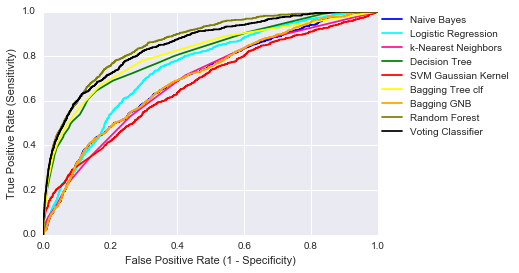

In [74]:
%matplotlib inline
plt.plot(gnb_fpr, gnb_tpr, 'blue', label ='Naive Bayes')
plt.plot(lr_fpr, lr_tpr, 'cyan', label ='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, 'deeppink', label ='k-Nearest Neighbors')
plt.plot(ct_fpr, ct_tpr, 'green', label = 'Decision Tree')
plt.plot(svm2_fpr, svm2_tpr, 'red', label ='SVM Gaussian Kernel')
plt.plot(bag1_fpr, bag1_tpr, 'yellow', label ='Bagging Tree clf')
plt.plot(bag2_fpr, bag2_tpr, 'orange', label ='Bagging GNB')
plt.plot(rf_fpr, rf_tpr, 'olive', label ='Random Forest')
plt.plot(vc_fpr, vc_tpr, 'black' , label ='Voting Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

Random Forest has the greatest AUC!

# Overview of the Model Performance

In [75]:
arr = np.array([['Null', 0.927886 , 0.5, '', 0.5, ''],
             ['Gaussian NB', 0.869374, 0.738319, 0.956000, 0.705189767546, 0.031000],
             ['Logistic Regression', 0.927863, 0.759281, 20.033000, 0.749813865133, 0.787000],
             ['Decision Tree', 0.865658, 0.676056, 1.807000, 0.804150504211, 0.069000],
             ['Bagging (Tree)', 0.863355, 0.627638, 5.924000, 0.819530195204, 0.294000],
             ['Bagging (GNB)', 0.867808, 0.738419, 5.925000, 0.705150890245, 0.273000],
             ['Rondom Forest', 0.823383, 0.541847, 6.726000, 0.858356552084, 0.364000],
             ['Knn', 0.927356, 0.652422, 5.120000,0.665510001708, 0.441000],
             #['SVM Gaussian', 0.930431, 0.633914, 69664.545, 0.631741, 9757.358],
            ['Voting Classifier', 0.864092, 0.642437, 14.516000, 0.84666811739, 0.865000]])
t = Table(arr, names=('Model', 'CV Accuracy', 'CV AUC', 'CV Time', 'AUC', 'Time'))
print t

       Model        CV Accuracy  CV AUC  CV Time      AUC        Time
------------------- ----------- -------- ------- -------------- -----
               Null    0.927886      0.5                    0.5      
        Gaussian NB    0.869374 0.738319   0.956 0.705189767546 0.031
Logistic Regression    0.927863 0.759281  20.033 0.749813865133 0.787
      Decision Tree    0.865658 0.676056   1.807 0.804150504211 0.069
     Bagging (Tree)    0.863355 0.627638   5.924 0.819530195204 0.294
      Bagging (GNB)    0.867808 0.738419   5.925 0.705150890245 0.273
      Rondom Forest    0.823383 0.541847   6.726 0.858356552084 0.364
                Knn    0.927356 0.652422    5.12 0.665510001708 0.441
  Voting Classifier    0.864092 0.642437  14.516  0.84666811739 0.865


In [219]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(features)
print features.shape

(300L, 2L)


# Model Evaluation With feature selection
Feature Importances
Since Gaussian NB,Logistic Regression,Knn  had the best predictability, I used these models to compute the featue importances.

In [ ]:
# compute feature importances
rfc = RandomForestClassifier(n_estimators=14, max_depth=8)
rfc.fit(X_train,y_train)
pd.DataFrame({'feature':feature_cols, 'importance':rfc.feature_importances_}).sort('importance')

In [64]:
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(y, n_iter=2, test_size=0.3)

In [65]:
train_index, test_index = next(iter(sss))

X_train = features.iloc[train_index]
y_train = y.iloc[train_index]

X_test = features.iloc[test_index]
y_test = y.iloc[test_index]

In [66]:
print 'Shape of training and test dataset %s %s ' %(X_train.shape, X_test.shape)

Shape of training and test dataset (30401, 11) (13030, 11) 


In [67]:
## Take a sample from the training data to do feature selection
sss = StratifiedShuffleSplit(y_train, n_iter=2, test_size=.2)

In [68]:
train_index, test_index = next(iter(sss))

X_train_features = X_train.iloc[test_index]
y_train_features = y_train.iloc[test_index]

X_train_rest = X_train.iloc[train_index]
y_train_rest = y_train.iloc[train_index]

In [69]:
print 'Shape of the training data used for feature selection %s and rest of the dataset %s ' %(X_train_features.shape, X_train_rest.shape)

Shape of the training data used for feature selection (6081, 11) and rest of the dataset (24320, 11) 


In [70]:
logreg = LogisticRegression()
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(y_train_features, 5), scoring='roc_auc')

rfecv.fit(X_train_features, y_train_features)

RFECV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=5, shuffle=False, random_state=None),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   estimator_params=None, scoring='roc_auc', step=1, verbose=0)

In [76]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


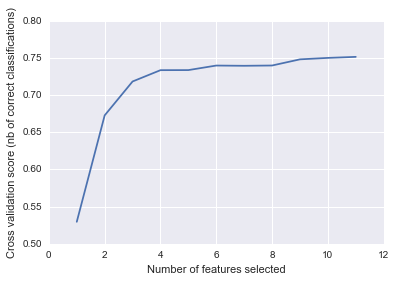

In [77]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [78]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [79]:
features_cols_np = np.array(features_cols)

In [80]:
features_to_consider = features_cols_np[rfecv.support_]

In [81]:
print 'Selected features are %s ' %(features_to_consider)

Selected features are ['vehicle_model_id' 'travel_type_id' 'from_area_id' 'to_area_id'
 'from_month' 'from_weekday' 'days_before_booking' 'online_booking'
 'mobile_site_booking' 'booking_month' 'booking_weekday'] 


# Fitting-Model

In [82]:
Xt = X_train_rest[features_cols]
yt = y_train_rest

In [83]:
Xtr, Xv, ytr, yv = train_test_split(Xt, yt, test_size=0.3)

In [84]:
logreg = LogisticRegression(C=13., penalty='l1', class_weight='auto')
etr = ExtraTreesClassifier(n_estimators=75, class_weight='auto')
knn = KNeighborsClassifier(weights='distance', n_neighbors=10)
rf = RandomForestClassifier(n_estimators=50)
gbc = GradientBoostingClassifier(subsample=0.8, n_estimators=200, max_depth=6)

In [90]:
sss = StratifiedShuffleSplit(ytr, 5, test_size=.2)

cv_scores_gbc = cross_val_score(gbc, Xtr, ytr, scoring='roc_auc', cv=sss)

In [91]:
print 'cross validation scores are %s ' %(cv_scores_gbc)

cross validation scores are [ 0.86787432  0.87559933  0.84944867  0.86144698  0.85467736] 


In [92]:
print 'Mean cross validation score %s ' %(cv_scores_gbc.mean())

Mean cross validation score 0.861809333214 


In [93]:
print 'Standard deviation in cv scores %s ' %(cv_scores_gbc.std())

Standard deviation in cv scores 0.00928148937303 


In [95]:
sss = StratifiedShuffleSplit(ytr, 5, test_size=.2)

cv_scores_rf = cross_val_score(rf, Xtr, ytr, scoring='roc_auc', cv=sss)

In [96]:
print 'cross validation scores are %s ' %(cv_scores_rf)

cross validation scores are [ 0.83712644  0.84151515  0.82965848  0.83463996  0.82959225] 


In [98]:
print 'Mean cross validation score %s ' %(cv_scores_rf.mean())

Mean cross validation score 0.834506454879 


In [99]:
print 'Standard deviation in cv scores %s ' %(cv_scores_rf.std())

Standard deviation in cv scores 0.00455315914431 


In [100]:
sss = StratifiedShuffleSplit(ytr, 5, test_size=.2)

cv_scores_knn = cross_val_score(knn, Xtr, ytr, scoring='roc_auc', cv=sss)

In [101]:
print 'cross validation scores are %s ' %(cv_scores_knn)

cross validation scores are [ 0.65433678  0.63483444  0.6619949   0.62062047  0.62574948] 


In [102]:
print 'Mean cross validation score %s ' %(cv_scores_knn.mean())

Mean cross validation score 0.639507215511 


In [103]:
print 'Standard deviation in cv scores %s ' %(cv_scores_knn.std())

Standard deviation in cv scores 0.016083726554 


In [104]:
sss = StratifiedShuffleSplit(ytr, 5, test_size=.2)

cv_scores_etr = cross_val_score(etr, Xtr, ytr, scoring='roc_auc', cv=sss)

In [105]:
print 'cross validation scores are %s ' %(cv_scores_etr)

cross validation scores are [ 0.83519076  0.8059707   0.81012466  0.79457433  0.82175446] 


In [106]:
print 'Mean cross validation score %s ' %(cv_scores_etr.mean())

Mean cross validation score 0.813522984195 


In [107]:
print 'Standard deviation in cv scores %s ' %(cv_scores_etr.std())

Standard deviation in cv scores 0.0138916286244 


In [108]:
sss = StratifiedShuffleSplit(ytr, 5, test_size=.2)

cv_scores_logreg = cross_val_score(logreg, Xtr, ytr, scoring='roc_auc', cv=sss)

In [109]:
print 'cross validation scores are %s ' %(cv_scores_logreg)

cross validation scores are [ 0.73625486  0.7505731   0.74417068  0.74280678  0.78367501] 


In [110]:
print 'Mean cross validation score %s ' %(cv_scores_logreg.mean())

Mean cross validation score 0.751496084058 


In [111]:
print 'Standard deviation in cv scores %s ' %(cv_scores_logreg.std())

Standard deviation in cv scores 0.0167200203236 


# Validation

In [114]:
C = np.linspace(0.1, 50, 5)
val_train, val_test = validation_curve(LogisticRegression(penalty='l1', class_weight='auto'),
                                       Xtr, ytr, 'C', C, cv=5, scoring='roc_auc')

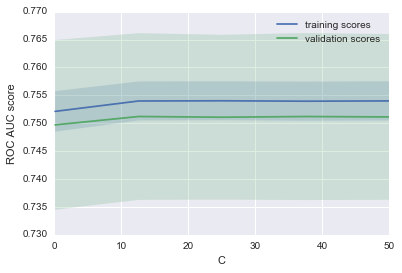

In [115]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(C, val_train, label='training scores')
plot_with_err(C, val_test, label='validation scores')
plt.xlabel('C'); plt.ylabel('ROC AUC score')
plt.legend();

# Learning-Curves

In [116]:
def plot_learning_curve(C=13):
    train_sizes = np.linspace(0.05, 1, 10)
    N_train, val_train, val_test = learning_curve(LogisticRegression(C=C, penalty='l2', class_weight='auto'),
                                                  Xtr, ytr, train_sizes, cv=5,
                                                  scoring='roc_auc')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('ROC AUC Score')
    plt.legend()

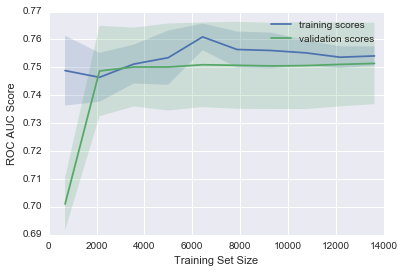

In [117]:
plot_learning_curve()

# Performance-on-test-set

In [118]:
knn.fit(Xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [119]:
logreg.fit(Xtr, ytr)

LogisticRegression(C=13.0, class_weight='auto', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [120]:
gbc.fit(Xtr, ytr)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [121]:
rf.fit(Xtr, ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
ytest_pred_knn = knn.predict(Xv)
ytest_pred_logreg = logreg.predict_proba(Xv)[:, 1]
ytest_pred_gbc = gbc.predict_proba(Xv)[:, 1]
ytest_preds_threshold_gbc = [1 if pred > 0.10 else 0 for pred in ytest_pred_gbc]
ytest_pred_rf = rf.predict(Xv)

In [138]:
print 'GradientBoost ROC AUC score on the test dataset ', roc_auc_score(yv, ytest_preds_threshold_gbc)

GradientBoost ROC AUC score on the test dataset  0.750358040663


In [126]:
ytest_preds_threshold_knn = [1 if pred > 0.10 else 0 for pred in ytest_pred_knn]

In [140]:
print 'KNeighbors ROC AUC score on the test dataset ', roc_auc_score(yv, ytest_preds_threshold_knn)

KNeighbors ROC AUC score on the test dataset  0.521129266741


In [129]:
ytest_preds_threshold_logreg = [1 if pred > 0.10 else 0 for pred in ytest_pred_logreg]

In [141]:
print 'LogisticRegression ROC AUC score on the test dataset ', roc_auc_score(yv, ytest_preds_threshold_logreg)

LogisticRegression ROC AUC score on the test dataset  0.518375815056


In [136]:
ytest_preds_threshold_rf = [1 if pred > 0.10 else 0 for pred in ytest_pred_rf]

In [139]:
print 'RandomForest ROC AUC score on the test dataset ', roc_auc_score(yv, ytest_preds_threshold_rf)

RandomForest ROC AUC score on the test dataset  0.578384403705


# Model-Training-on-full-dataset

In [142]:
final_features = features[features_cols]

In [143]:
logreg.fit(final_features, y)
knn.fit(final_features, y)
gbc.fit(final_features, y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

In [144]:
cars_cancel_test = pd.read_csv('Kaggle_YourCabs_score.csv', index_col='id')
cars_cancel_test.head()

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Unnamed: 18,Unnamed: 19
id,,,,,,,,,,,,,,,,,,,
132516,22179,12,NaN,2,1096.0,393.0,NaN,NaN,1/1/2013 9:30,NaN,0,0,1/1/2013 7:51,12.965190,77.719320,13.19956,77.70688,NaN,NaN
132529,22187,65,NaN,2,1061.0,393.0,NaN,NaN,1/2/2013 1:00,NaN,0,0,1/1/2013 12:11,12.924878,77.566255,13.19956,77.70688,NaN,NaN
132532,23180,12,NaN,2,1192.0,353.0,NaN,NaN,1/2/2013 4:30,NaN,0,0,1/1/2013 12:22,12.976770,77.572700,13.03241,77.59914,NaN,NaN
132547,30849,12,NaN,2,515.0,849.0,NaN,NaN,1/1/2013 20:15,NaN,0,0,1/1/2013 16:51,12.978960,77.673450,12.95434,77.60072,NaN,NaN
132548,22198,12,NaN,2,83.0,463.0,NaN,NaN,1/3/2013 0:30,NaN,0,0,1/1/2013 17:04,12.924150,77.672290,12.96037,77.58132,NaN,NaN


In [145]:
cars_cancel_test['from_date'] = pd.to_datetime(cars_cancel_test['from_date'])
cars_cancel_test['to_date'] = pd.to_datetime(cars_cancel_test['to_date'])
cars_cancel_test['booking_created'] = pd.to_datetime(cars_cancel_test['booking_created'])

In [146]:
cars_cancel_test.loc[:, 'difference'] = cars_cancel_test.loc[:, ('from_date')] - cars_cancel_test.loc[:, ('booking_created')]

In [147]:
cars_cancel_test.loc[:, 'from_month'] = cars_cancel_test.from_date.dt.month
cars_cancel_test.loc[:, 'from_weekday'] = cars_cancel_test.from_date.dt.weekday

cars_cancel_test.loc[:, 'booking_month'] = cars_cancel_test.booking_created.dt.month
cars_cancel_test.loc[:, 'booking_weekday'] = cars_cancel_test.booking_created.dt.weekday

In [148]:
cars_cancel_test.loc[:, 'days_before_booking'] = (cars_cancel_test.difference / np.timedelta64(1, 's')).astype(int)/ ( 24. * 60 * 60 )

In [149]:
features_test = cars_cancel_test[features_cols]

In [150]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 132516 to 185942
Data columns (total 11 columns):
vehicle_model_id       10000 non-null int64
travel_type_id         10000 non-null int64
from_area_id           9980 non-null float64
to_area_id             7850 non-null float64
from_month             10000 non-null int64
from_weekday           10000 non-null int64
days_before_booking    10000 non-null float64
online_booking         10000 non-null int64
mobile_site_booking    10000 non-null int64
booking_month          10000 non-null int64
booking_weekday        10000 non-null int64
dtypes: float64(3), int64(8)
memory usage: 937.5 KB


In [151]:
features_test.from_area_id.fillna(-9999, inplace=True)
features_test.to_area_id.fillna(-9999, inplace=True)

In [152]:
preds_logreg = logreg.predict(features_test)
preds_knn = knn.predict(features_test)
preds_gbc = gbc.predict_proba(features_test)[:, 1]

In [153]:
preds_threshold_gbc = [1 if pred > 0.10 else 0 for pred in preds_gbc]
preds_threshold_knn = [1 if pred > 0.10 else 0 for pred in preds_knn]
preds_threshold_logreg = [1 if pred > 0.10 else 0 for pred in preds_logreg]

In [154]:
submission = pd.DataFrame({'id': features_test.index.values, 'Car_Cancellation': preds_threshold_gbc})

In [155]:
submission.to_csv('GBC_threshold.csv', index=False)

# Clustering: K-Means In-Depth

Here we'll explore K Means Clustering, which is an unsupervised clustering technique.
We'll start with our standard set of initial imports

In [156]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Introducing K-Means
K Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels).
K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.
Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

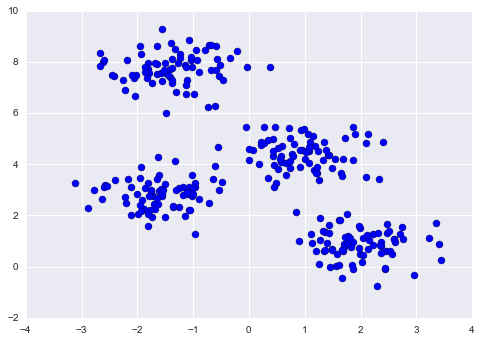

In [157]:
from sklearn.datasets.samples_generator import make_blobs
features, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(features[:, 0], features[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known Expectation Maximization (EM) procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

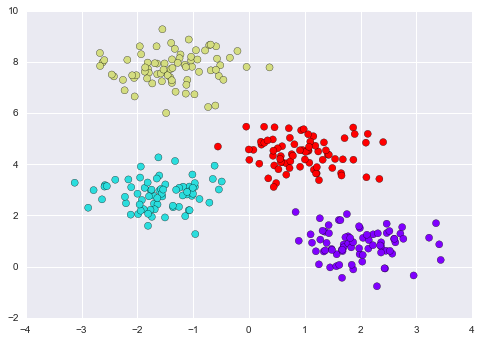

In [158]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(features)
y_kmeans = est.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='rainbow');

The algorithm identifies the four clusters of points in a manner very similar to what we would do by eye!

In [171]:
from sklearn import cluster

In [175]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1)

In [176]:
kmeans.fit(features)

Initialization complete
Iteration  0, inertia 268.984
Iteration  1, inertia 194.823
Iteration  2, inertia 193.499
Iteration  3, inertia 193.235
Converged at iteration 3
Initialization complete
Iteration  0, inertia 338.661
Iteration  1, inertia 195.995
Iteration  2, inertia 194.729
Iteration  3, inertia 194.577
Iteration  4, inertia 194.247
Iteration  5, inertia 193.397
Iteration  6, inertia 193.332
Converged at iteration 6
Initialization complete
Iteration  0, inertia 289.954
Iteration  1, inertia 192.378
Iteration  2, inertia 190.436
Iteration  3, inertia 189.231
Iteration  4, inertia 188.983
Iteration  5, inertia 188.773
Converged at iteration 5
Initialization complete
Iteration  0, inertia 340.425
Iteration  1, inertia 200.138
Iteration  2, inertia 194.672
Iteration  3, inertia 194.465
Iteration  4, inertia 194.122
Iteration  5, inertia 193.973
Converged at iteration 5
Initialization complete
Iteration  0, inertia 309.548
Iteration  1, inertia 199.967
Iteration  2, inertia 196.903


KMeans(copy_x=True, init='k-means++', max_iter=500, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)

In [177]:
clusters = kmeans.predict(features)

In [178]:
print clusters

[2 4 1 0 2 2 3 1 0 0 3 4 1 4 2 1 1 2 3 3 2 2 1 3 3 1 2 1 3 1 0 4 1 4 4 4 4
 4 3 2 1 3 1 1 3 3 0 3 4 2 3 2 0 2 2 3 0 3 4 2 4 1 0 3 3 3 4 2 4 3 1 3 0 3
 3 0 3 1 2 0 2 1 2 2 0 1 2 1 4 4 1 2 0 3 3 1 2 2 1 3 0 2 0 2 1 2 2 1 4 1 3
 3 2 4 2 1 4 2 2 1 3 2 3 2 2 2 2 3 2 3 0 3 3 2 4 3 3 4 1 0 4 3 1 3 1 3 4 1
 4 4 4 1 4 1 2 3 0 3 2 1 4 1 1 2 1 3 3 1 2 1 1 0 2 1 3 0 2 2 1 3 2 1 3 3 1
 1 1 1 2 4 1 3 1 1 3 3 3 1 3 4 1 3 2 3 1 4 3 0 1 4 1 3 1 1 4 3 3 2 2 1 4 2
 2 3 2 3 1 0 0 1 1 0 1 2 3 1 2 3 0 3 2 1 2 4 4 4 4 3 3 4 1 3 2 1 3 3 3 2 2
 4 1 1 3 2 0 3 1 0 1 2 2 3 3 1 2 2 2 1 0 4 2 2 1 2 2 2 4 3 0 1 2 2 4 0 0 2
 2 1 0 3]


The centroids provide an aggregate representation and a characterization of each cluster.

In [179]:
print kmeans.cluster_centers_

[[-0.89247947  8.18394342]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [-1.73102222  7.43349916]]


In [180]:
from sklearn.metrics import completeness_score, homogeneity_score

In [181]:
print completeness_score(y,clusters)

0.890429639086


In [182]:
print homogeneity_score(y,clusters)

1.0


The completeness score approaches is 0.89 where most of the data points that are members of a given class are elements of the same cluster while the homogeneity score is 1 where all the clusters contain almost only data points that are member of a single class.

In [184]:
import kMeans

In [185]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [186]:
centroids, clusters = kMeans.kMeans(features, 3, kMeans.distEclud, kMeans.randCent)

In [187]:
print centroids

[[ 1.98726097  0.90144281]
 [-1.37324398  7.75368871]
 [-0.33514647  3.62624134]]


In [188]:
print clusters

[[  0.00000000e+00   2.84844858e+00]
 [  1.00000000e+00   1.20014351e-01]
 [  2.00000000e+00   4.39201264e+00]
 [  1.00000000e+00   1.29509394e-01]
 [  0.00000000e+00   1.49480423e+00]
 [  0.00000000e+00   2.51286370e+00]
 [  2.00000000e+00   6.28770249e+00]
 [  2.00000000e+00   3.62847734e+00]
 [  1.00000000e+00   1.82518982e+00]
 [  1.00000000e+00   1.26063027e+00]
 [  2.00000000e+00   2.61660090e+00]
 [  1.00000000e+00   2.04183998e+00]
 [  2.00000000e+00   3.25969220e+00]
 [  1.00000000e+00   1.46801924e+00]
 [  0.00000000e+00   1.14924870e+00]
 [  2.00000000e+00   7.31479516e-01]
 [  2.00000000e+00   2.79031528e+00]
 [  0.00000000e+00   4.94393166e-01]
 [  2.00000000e+00   7.80084890e-01]
 [  2.00000000e+00   2.57401475e+00]
 [  0.00000000e+00   6.81312276e-01]
 [  0.00000000e+00   1.25451016e-01]
 [  2.00000000e+00   3.13481023e+00]
 [  2.00000000e+00   3.36002789e+00]
 [  2.00000000e+00   3.54890171e+00]
 [  2.00000000e+00   1.19286095e+00]
 [  0.00000000e+00   8.52210015e-02]
 

In [190]:
newC = np.ravel(clusters.T[0])

In [191]:

newC = newC.astype(int)

In [192]:
print newC

[0 1 2 1 0 0 2 2 1 1 2 1 2 1 0 2 2 0 2 2 0 0 2 2 2 2 0 2 2 2 1 1 2 1 1 1 1
 1 2 0 2 2 2 2 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 2 1 2 2 2 1 0 1 2 2 2 1 2
 2 1 2 2 0 1 0 2 0 0 1 2 0 2 1 1 2 0 1 2 2 2 0 0 2 2 1 0 1 0 2 0 0 2 1 2 2
 2 0 1 0 2 1 0 0 2 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 2 1 1 2 2 2 2 2 1 2
 1 1 1 2 1 2 0 2 1 2 0 2 1 2 2 0 2 2 2 2 0 2 2 1 0 2 2 1 0 0 2 2 0 2 2 2 2
 2 2 2 0 1 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 1 2 1 2 1 2 2 2 2 1 2 2 0 0 2 1 0
 0 2 0 2 2 1 1 2 2 1 2 0 2 2 0 2 1 2 0 2 0 1 1 1 1 2 2 1 2 2 0 2 2 2 2 0 0
 1 2 2 2 0 1 2 2 1 2 0 0 2 2 0 0 0 0 2 1 1 0 0 2 0 0 0 1 2 1 2 0 0 1 1 1 0
 0 2 1 2]


In [193]:
print completeness_score(y,newC)

0.983010870748


In [194]:
print homogeneity_score(y,newC)

0.738872920101


In [195]:
centroids_bk, clusters_bk = kMeans.biKmeans(features, 3, kMeans.distEclud)

sseSplit, and notSplit:  1190.78235936 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  300
sseSplit, and notSplit:  51.4909680918 1116.84667042
sseSplit, and notSplit:  480.082908229 73.9356889432
the bestCentToSplit is:  1
the len of bestClustAss is:  223


In [196]:
print centroids_bk

[[-1.33465447  1.98726097 -0.34123624]]


In [197]:
bkC =np.ravel(clusters_bk.T[0])
bkC = bkC.astype(int)

In [198]:
print bkC

[1 0 2 0 1 1 2 2 0 0 2 0 2 0 1 2 2 1 2 2 1 1 2 2 2 2 1 2 2 2 0 0 2 0 0 0 0
 0 2 1 2 2 0 2 2 2 0 2 0 1 2 1 0 1 1 2 0 2 0 1 0 2 0 2 2 2 0 1 0 2 2 2 0 2
 2 0 2 2 1 0 1 2 1 1 0 2 1 2 0 0 2 1 0 2 2 2 1 1 0 2 0 1 0 1 2 1 1 2 0 2 2
 2 1 0 1 2 0 1 1 2 2 1 2 1 1 1 1 2 1 2 0 2 2 1 0 2 2 0 2 0 0 2 2 2 2 2 0 2
 0 0 0 2 0 2 1 2 0 2 1 2 0 2 2 1 2 2 2 2 1 2 2 0 1 2 2 0 1 1 2 2 1 2 2 2 2
 2 2 2 1 0 2 2 2 2 2 2 2 2 2 0 2 2 1 2 2 0 2 0 2 0 2 2 2 2 0 2 2 1 1 2 0 1
 1 2 1 2 2 0 0 2 2 0 2 1 2 2 1 2 0 2 1 2 1 0 0 0 0 2 2 0 2 2 1 2 2 2 2 1 1
 0 2 2 2 1 0 2 2 0 2 1 1 2 2 1 1 1 1 2 0 0 1 1 2 1 1 1 0 2 0 2 1 1 0 0 0 1
 1 2 0 2]


In [199]:
print completeness_score(y,bkC)

0.953794659143


In [200]:
print homogeneity_score(y,bkC)

0.719969860199


#  PCA for dimension reduction

In [203]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
feature_trans =pca.fit(features).transform(features)

In [204]:
np.set_printoptions(precision=2,suppress=True)
print feature_trans

[[ 2.02  0.02]
 [-3.72  0.13]
 [-0.56  1.52]
 [-3.92  0.66]
 [ 2.42  0.31]
 [ 4.79  1.62]
 [ 1.42 -2.62]
 [ 0.21  1.46]
 [-4.15  1.65]
 [-4.57  1.28]
 [ 0.38 -2.04]
 [-5.09 -0.63]
 [ 0.02  1.36]
 [-3.58 -0.82]
 [ 4.24 -0.31]
 [ 0.2   0.41]
 [-0.07  1.21]
 [ 4.21  0.93]
 [ 0.33 -1.31]
 [ 1.17 -1.7 ]
 [ 3.56  1.38]
 [ 3.27  0.48]
 [-0.67  1.11]
 [ 0.2  -2.27]
 [ 0.46 -2.3 ]
 [-0.89 -0.2 ]
 [ 3.53  0.28]
 [-0.43  0.85]
 [ 0.34 -3.3 ]
 [ 0.03  0.2 ]
 [-3.77  1.14]
 [-3.95 -0.47]
 [ 0.58  1.8 ]
 [-3.01  0.12]
 [-4.3   0.14]
 [-4.16 -0.77]
 [-4.03 -0.39]
 [-4.74 -0.73]
 [ 0.46 -2.61]
 [ 3.7   0.17]
 [ 0.62  0.46]
 [ 0.93 -2.59]
 [-1.39  0.58]
 [ 0.42  1.51]
 [ 0.68 -2.16]
 [ 0.68 -1.42]
 [-4.33  0.45]
 [ 0.48 -1.91]
 [-3.89  0.14]
 [ 3.06  0.81]
 [-0.36 -1.97]
 [ 4.06  0.87]
 [-3.69  0.69]
 [ 3.63  0.23]
 [ 2.47  0.82]
 [ 0.59 -1.48]
 [-3.52  1.55]
 [ 1.35 -1.85]
 [-4.17 -0.1 ]
 [ 3.35  0.03]
 [-3.96 -0.68]
 [-0.09  0.67]
 [-5.48  0.77]
 [ 0.5  -1.36]
 [-0.08 -2.27]
 [ 0.59 -1.56]
 [-4.24 -0

In [205]:
print pca.explained_variance_ratio_

[ 0.83  0.17]


Looking at the above, it can be observed that the first 2 components capture (explain) 95% of the variance in the data.
Now, we can redo the clustering, but this time in the lower dimensional space:

In [212]:
centroids_pca,clusters_pca = kMeans.kMeans(feature_trans,3,kMeans.distEclud,kMeans.randCent)

In [213]:
print clusters_pca

[[ 1.    2.85]
 [ 0.    0.12]
 [ 2.    4.39]
 [ 0.    0.13]
 [ 1.    1.49]
 [ 1.    2.51]
 [ 2.    6.29]
 [ 2.    3.63]
 [ 0.    1.83]
 [ 0.    1.26]
 [ 2.    2.62]
 [ 0.    2.04]
 [ 2.    3.26]
 [ 0.    1.47]
 [ 1.    1.15]
 [ 2.    0.73]
 [ 2.    2.79]
 [ 1.    0.49]
 [ 2.    0.78]
 [ 2.    2.57]
 [ 1.    0.68]
 [ 1.    0.13]
 [ 2.    3.13]
 [ 2.    3.36]
 [ 2.    3.55]
 [ 2.    1.19]
 [ 1.    0.09]
 [ 2.    2.04]
 [ 2.    8.22]
 [ 2.    0.43]
 [ 0.    0.75]
 [ 0.    0.61]
 [ 2.    5.18]
 [ 0.    1.03]
 [ 0.    0.11]
 [ 0.    1.19]
 [ 0.    0.49]
 [ 0.    1.61]
 [ 2.    4.8 ]
 [ 1.    0.16]
 [ 2.    1.01]
 [ 2.    5.19]
 [ 2.    3.5 ]
 [ 2.    3.88]
 [ 2.    3.23]
 [ 2.    1.21]
 [ 0.    0.12]
 [ 2.    2.26]
 [ 0.    0.05]
 [ 1.    0.37]
 [ 2.    2.63]
 [ 1.    0.3 ]
 [ 0.    0.25]
 [ 1.    0.11]
 [ 1.    1.38]
 [ 2.    1.25]
 [ 0.    1.78]
 [ 2.    3.37]
 [ 0.    0.19]
 [ 1.    0.35]
 [ 0.    0.98]
 [ 2.    1.31]
 [ 0.    2.37]
 [ 2.    0.95]
 [ 2.    3.42]
 [ 2.    1.43]
 [ 0.    1

In [215]:
print centroids_pca

[[-4.01  0.31]
 [ 3.61  0.56]
 [ 0.18 -0.44]]


In [216]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(features)
print 'Explained variance of first 2 components:'
print pca.explained_variance_ratio_
print 'Loadings from first 2 components:'
print pca.components_

Explained variance of first 2 components:
[ 0.83  0.17]
Loadings from first 2 components:
[[ 0.41 -0.91]
 [ 0.91  0.41]]


To see what these numbers mean, let's view them as vectors plotted on top of the data:

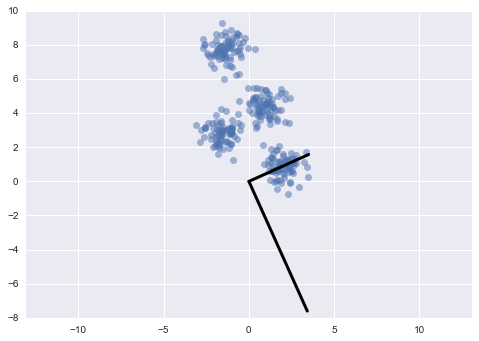

In [217]:
plt.plot(features[:, 0], features[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');


Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction. The explained variance quantifies this measure of "importance" in direction.

       Model        CV Accuracy  CV AUC  CV Time      AUC        Time
------------------- ----------- -------- ------- -------------- -----
               Null    0.927886      0.5                    0.5      
        Gaussian NB    0.869374 0.738319   0.956 0.705189767546 0.031
Logistic Regression    0.927863 0.759281  20.033 0.749813865133 0.787
      Decision Tree    0.865658 0.676056   1.807 0.804150504211 0.069
     Bagging (Tree)    0.863355 0.627638   5.924 0.819530195204 0.294
      Bagging (GNB)    0.867808 0.738419   5.925 0.705150890245 0.273
      Rondom Forest    0.823383 0.541847   6.726 0.858356552084 0.364
                Knn    0.927356 0.652422    5.12 0.665510001708 0.441
  Voting Classifier    0.864092 0.642437  14.516  0.84666811739 0.865



Results

Besides  Rondom Forest, Bagging (with GNB as base estimator),Decision Tree,Bagging (Tree),Voting Classifie , all models had  accuracies around 0.86 and the null model had high accuracy which was 0.9279.where as Logistic Regression,Knn did equally better like the null model.As far as the AUC measure, all models had greater AUC than the null model which was 0.5. Random Forest had the next less AUC; Logistic Regression had best predictability,its 10-fold cross-validation accuracies were 0.9278  and AUC was 0.759281.And Random Forest has the greatest AUC! The cross-validation computation of all models except SVM Gaussian Kernel could be finished within a minute. The SVM model took nearly 20 hours to finish the 10-fold cross-validation, but its predictive performace was nearly the worst among all models. I also estimated the importance of each feature using the best models Logistic Regression,Knn. . I also tried to remove features with variance lower than 0.8*(1-0.8), but none of the features was lower than this threshold. Therefore, I thought that it would be a good stopping point for my analysis and wouldn't proceed the model evaluations with model selection.From PCA it can be observed that the first 2 components capture (explain) 95% of the variance in the data.we can notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction. The explained variance quantifies this measure of "importance" in direction.